# Data Analysis and Training Model

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.cm as cm
import matplotlib.pyplot as plt

datatrain=pd.read_csv("train.csv")
datatrain.head()

,vidid,adview,views,likes,dislikes,comment,published,duration,category
0,VID_18655,40,1031602,8523,363,1095,14-09-2016,PT7M37S,F
1,VID_14135,2,1707,56,2,6,01-10-2016,PT9M30S,D
2,VID_2187,1,2023,25,0,2,02-07-2016,PT2M16S,C
3,VID_23096,6,620860,777,161,153,27-07-2016,PT4M22S,H
4,VID_10175,1,666,1,0,0,29-06-2016,PT31S,D


In [ ]:
datatrain.shape

(14999, 9)

In [ ]:
#alphabets to numbers in column 'category'
category={'A':1,'B':2,'C':3,'D':4,'E':5,'F':6,'G':7,'H':8}
datatrain['category']=datatrain['category'].map(category)
datatrain.head()

,vidid,adview,views,likes,dislikes,comment,published,duration,category
0,VID_18655,40,1031602,8523,363,1095,14-09-2016,PT7M37S,6
1,VID_14135,2,1707,56,2,6,01-10-2016,PT9M30S,4
2,VID_2187,1,2023,25,0,2,02-07-2016,PT2M16S,3
3,VID_23096,6,620860,777,161,153,27-07-2016,PT4M22S,8
4,VID_10175,1,666,1,0,0,29-06-2016,PT31S,4


In [ ]:
#removing F in all categories
datatrain=datatrain[datatrain.views!='F']
datatrain=datatrain[datatrain.likes!='F']
datatrain=datatrain[datatrain.dislikes!='F']
datatrain=datatrain[datatrain.comment!='F']


In [ ]:
#convert value to integer
datatrain['views']=pd.to_numeric(datatrain['views'])
datatrain['likes']=pd.to_numeric(datatrain['likes'])
datatrain['dislikes']=pd.to_numeric(datatrain['dislikes'])
datatrain['comment']=pd.to_numeric(datatrain['comment'])
datatrain['adview']=pd.to_numeric(datatrain['adview'])

column_vidid=datatrain['vidid']
datatrain.head()


,vidid,adview,views,likes,dislikes,comment,published,duration,category
0,VID_18655,40,1031602,8523,363,1095,14-09-2016,PT7M37S,6
1,VID_14135,2,1707,56,2,6,01-10-2016,PT9M30S,4
2,VID_2187,1,2023,25,0,2,02-07-2016,PT2M16S,3
3,VID_23096,6,620860,777,161,153,27-07-2016,PT4M22S,8
4,VID_10175,1,666,1,0,0,29-06-2016,PT31S,4


In [ ]:
#convert columns 'vidid','published','duration' to number by encoding
from sklearn.preprocessing import LabelEncoder

datatrain['vidid']=LabelEncoder().fit_transform(datatrain['vidid'])
datatrain['published']=LabelEncoder().fit_transform(datatrain['published'])
datatrain['duration']=LabelEncoder().fit_transform(datatrain['duration'])
datatrain.head()

,vidid,adview,views,likes,dislikes,comment,published,duration,category
0,5912,40,1031602,8523,363,1095,1090,2925,6
1,2741,2,1707,56,2,6,64,3040,4
2,8138,1,2023,25,0,2,122,1863,3
3,9005,6,620860,777,161,153,2088,2546,8
4,122,1,666,1,0,0,2233,1963,4


In [ ]:
#converting duration to sec

import datetime
import time

def checki(x):
  y = x[2:]
  h = ''
  m = ''
  s = ''
  mm = ''
  P = ['H','M','S']
  for i in y:
    if i not in P:
      mm+=i
    else:
      if(i=="H"):
        h = mm
        mm = ''
      elif(i == "M"):
        m = mm
        mm = ''
      else:
        s = mm
        mm = ''
  if(h==''):
    h = '00'
  if(m == ''):
    m = '00'
  if(s==''):
    s='00'
  bp = h+':'+m+':'+s
  return bp

train=pd.read_csv('train.csv')
mp=pd.read_csv('train.csv')['duration']
time=mp.apply(checki)

def func_sec(time_string):
  h, m, s = time_string.split(':')
  return int(h) * 3600 + int(m) * 60 + int(s)
  return time1

time1=time.apply(func_sec)

datatrain['duration']=time1
datatrain.head()


,vidid,adview,views,likes,dislikes,comment,published,duration,category
0,5912,40,1031602,8523,363,1095,1090,457,6
1,2741,2,1707,56,2,6,64,570,4
2,8138,1,2023,25,0,2,122,136,3
3,9005,6,620860,777,161,153,2088,262,8
4,122,1,666,1,0,0,2233,31,4


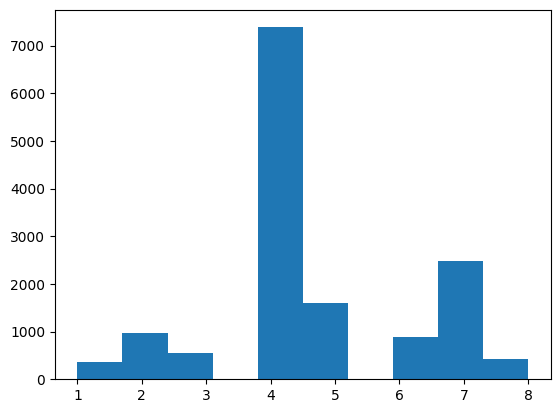

In [ ]:
plt.hist(datatrain['category'])
plt.show()


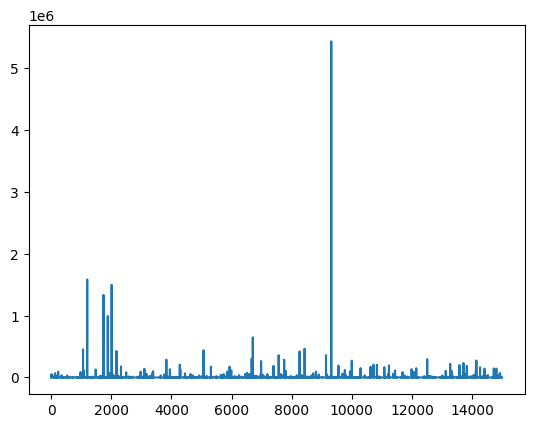

In [ ]:
plt.plot(datatrain['adview'])
plt.show()

In [ ]:
datatrain=datatrain[datatrain['adview']<2000000]
datatrain.shape

(14636, 9)

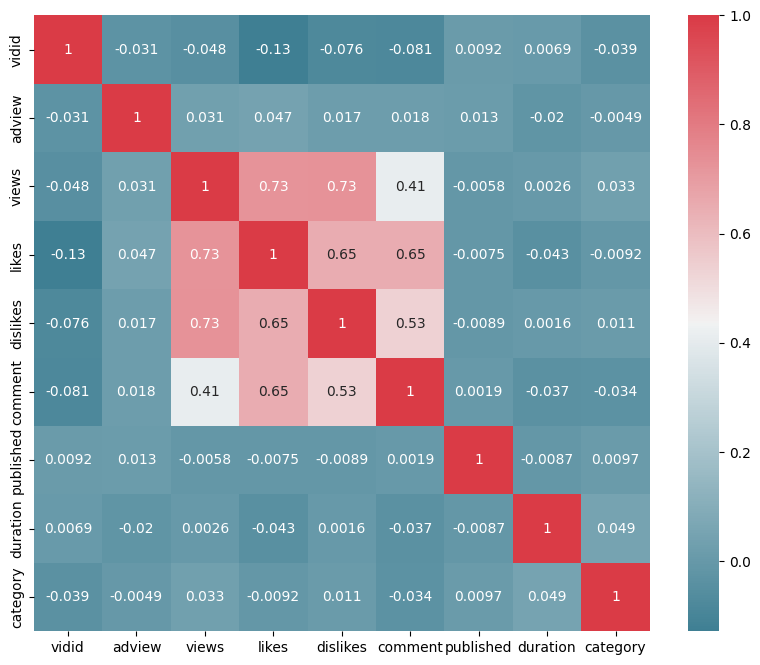

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt  # Added matplotlib.pyplot import

f, ax = plt.subplots(figsize=(10, 8))
corr=datatrain.corr()
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=bool), cmap=sns.diverging_palette(220, 10, as_cmap=True),
square=True, ax=ax,annot=True)
plt.show()

In [ ]:
# Split Data
Y_train = pd.DataFrame(data = datatrain.iloc[:, 1].values, columns = ['target']) #this is the adview column

#remove unwanted columns
datatrain=datatrain.drop(["adview"],axis=1)
datatrain=datatrain.drop(["vidid"],axis=1)
datatrain.head()


,views,likes,dislikes,comment,published,duration,category
0,1031602,8523,363,1095,1090,457,6
1,1707,56,2,6,64,570,4
2,2023,25,0,2,122,136,3
3,620860,777,161,153,2088,262,8
4,666,1,0,0,2233,31,4


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(datatrain, Y_train, test_size=0.2, random_state=42)

X_train.head()

,views,likes,dislikes,comment,published,duration,category
13440,86739,117,9,4,247,180,4
9523,1419766,887,362,232,82,5811,7
3012,26086,19,0,9,2005,178,6
1888,305445,3662,45,555,2375,257,7
11378,737649,1702,96,53,465,895,4


In [ ]:
X_train.describe()

,views,likes,dislikes,comment,published,duration,category
count,1.170800e+04,11708.000000,11708.000000,11708.000000,11708.000000,11708.000000,11708.000000
mean,6.974161e+05,2771.122139,251.030577,418.178767,1212.619406,1048.108985,4.611548
std,2.582877e+06,8734.608422,965.881840,1556.703705,695.032779,2379.930309,1.579242
min,4.900000e+01,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,3.133975e+04,86.000000,7.000000,7.000000,606.000000,188.000000,4.000000
50%,1.609395e+05,461.000000,39.000000,46.000000,1220.000000,327.000000,4.000000
75%,5.842132e+05,1897.000000,170.000000,232.000000,1827.000000,726.000000,6.000000
max,1.380479e+08,283824.000000,49449.000000,75045.000000,2383.000000,42317.000000,8.000000


In [ ]:
# Normalise Data

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.fit_transform(X_test)
X_train.mean()


0.15357571865666558

In [ ]:
# Evaluation Metrics

from sklearn import metrics
def print_error(X_test, y_test, model_name):
  prediction = model_name.predict(X_test)

  print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, prediction))
  print('Mean Squared Error:', metrics.mean_squared_error(y_test, prediction))
  print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, prediction)))

In [ ]:
# Linear Regression
from sklearn import linear_model
linear_regression = linear_model.LinearRegression()
linear_regression.fit(X_train, y_train)
print_error(X_test,y_test, linear_regression)


# Support Vector Regressor
from sklearn.svm import SVR
supportvector_regressor = SVR()
supportvector_regressor.fit(X_train,y_train)
print_error(X_test,y_test, linear_regression)

Mean Absolute Error: 3493.3179717888033
Mean Squared Error: 838355049.0604033
Root Mean Squared Error: 28954.361485973117


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Mean Absolute Error: 3493.3179717888033
Mean Squared Error: 838355049.0604033
Root Mean Squared Error: 28954.361485973117


In [ ]:
# Decision Tree Regressor
from sklearn.tree import DecisionTreeRegressor
decision_tree = DecisionTreeRegressor()
decision_tree.fit(X_train, y_train)
print_error(X_test,y_test, decision_tree)

# Random Forest Regressor
from sklearn.ensemble import RandomForestRegressor
n_estimators = 200
max_depth = 25
min_samples_split=15
min_samples_leaf=2

random_forest = RandomForestRegressor(n_estimators=100, criterion='squared_error', max_depth=None, min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features='auto', max_leaf_nodes=None, min_impurity_decrease=0.0, bootstrap=True, oob_score=False, n_jobs=None, random_state=None, verbose=0, warm_start=False, ccp_alpha=0.0, max_samples=None)
#random_forest = RandomForestRegressor(n_estimators = n_estimators, max_depth = max_depth, min_samples_split=min_samples_split)
random_forest.fit(X_train,y_train)
print_error(X_test,y_test, random_forest)


Mean Absolute Error: 4397.806352459016
Mean Squared Error: 2630313392.8746586
Root Mean Squared Error: 51286.581021497805


<ipython-input-73-f941aab5d2c7>:16: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  random_forest.fit(X_train,y_train)
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


Mean Absolute Error: 3637.0983230874317
Mean Squared Error: 1117359442.8390028
Root Mean Squared Error: 33426.926912879724


In [ ]:
# Artificial Neural Network
import keras
from keras.layers import Dense
ann = keras.models.Sequential([
Dense(6, activation="relu",
input_shape=X_train.shape[1:]),
Dense(6,activation="relu"),
Dense(1)
])
optimizer=keras.optimizers.Adam()
loss=keras.losses.mean_squared_error
ann.compile(optimizer=optimizer,loss=loss,metrics=["mean_squared_error"])
history=ann.fit(X_train,y_train,epochs=100)
ann.summary()
print_error(X_test,y_test,ann)

Epoch 1/100
366/366 [==============================] - 2s 2ms/step - loss: 767407232.0000 - mean_squared_error: 767407232.0000
Epoch 2/100
366/366 [==============================] - 1s 2ms/step - loss: 767405184.0000 - mean_squared_error: 767405184.0000
Epoch 3/100
366/366 [==============================] - 1s 2ms/step - loss: 767400960.0000 - mean_squared_error: 767400960.0000
Epoch 4/100
366/366 [==============================] - 1s 2ms/step - loss: 767394368.0000 - mean_squared_error: 767394368.0000
Epoch 5/100
366/366 [==============================] - 1s 2ms/step - loss: 767382656.0000 - mean_squared_error: 767382656.0000
Epoch 6/100
366/366 [==============================] - 1s 2ms/step - loss: 767365056.0000 - mean_squared_error: 767365056.0000
Epoch 7/100
366/366 [==============================] - 1s 2ms/step - loss: 767343936.0000 - mean_squared_error: 767343936.0000
Epoch 8/100
366/366 [==============================] - 1s 2ms/step - loss: 767318144.0000 - mean_squared_error:

In [ ]:
#Saving Scikitlearn models
import joblib
joblib.dump(random_forest, "randomforest_youtubeadview.pkl")

# Saving Keras Artificial Neural Network model
ann.save("ann_youtubeadview.h5")

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


#Testing and Prediction


In [ ]:
datatest=pd.read_csv('test.csv')
datatest.head()

,vidid,views,likes,dislikes,comment,published,duration,category
0,VID_1054,440238,6153,218,1377,18-02-2017,PT7M29S,B
1,VID_18629,1040132,8171,340,1047,28-06-2016,PT6M29S,F
2,VID_13967,28534,31,11,1,10-03-2014,PT37M54S,D
3,VID_19442,1316715,2284,250,274,05-06-2010,PT9M55S,G
4,VID_770,1893173,2519,225,116,03-09-2016,PT3M8S,B


In [ ]:
datatest.shape

(8764, 8)

In [ ]:
#alphabets to numbers in column 'category'
category={'A':1,'B':2,'C':3,'D':4,'E':5,'F':6,'G':7,'H':8}
datatest['category']=datatest['category'].map(category)
datatest.head()

,vidid,views,likes,dislikes,comment,published,duration,category
0,VID_1054,440238,6153,218,1377,18-02-2017,PT7M29S,2
1,VID_18629,1040132,8171,340,1047,28-06-2016,PT6M29S,6
2,VID_13967,28534,31,11,1,10-03-2014,PT37M54S,4
3,VID_19442,1316715,2284,250,274,05-06-2010,PT9M55S,7
4,VID_770,1893173,2519,225,116,03-09-2016,PT3M8S,2


In [ ]:
#removing F in all categories
datatest=datatest[datatest.views!='F']
datatest=datatest[datatest.likes!='F']
datatest=datatest[datatest.dislikes!='F']
datatest=datatest[datatest.comment!='F']

In [ ]:
#convert value to integer
datatest['views']=pd.to_numeric(datatest['views'])
datatest['likes']=pd.to_numeric(datatest['likes'])
datatest['dislikes']=pd.to_numeric(datatest['dislikes'])
datatest['comment']=pd.to_numeric(datatest['comment'])

column_vidid=datatest['vidid']
datatest.head()

,vidid,views,likes,dislikes,comment,published,duration,category
0,VID_1054,440238,6153,218,1377,18-02-2017,PT7M29S,2
1,VID_18629,1040132,8171,340,1047,28-06-2016,PT6M29S,6
2,VID_13967,28534,31,11,1,10-03-2014,PT37M54S,4
3,VID_19442,1316715,2284,250,274,05-06-2010,PT9M55S,7
4,VID_770,1893173,2519,225,116,03-09-2016,PT3M8S,2


In [ ]:
#convert columns 'vidid','published','duration' to number by encoding
from sklearn.preprocessing import LabelEncoder

datatest['vidid']=LabelEncoder().fit_transform(datatest['vidid'])
datatest['published']=LabelEncoder().fit_transform(datatest['published'])
datatest['duration']=LabelEncoder().fit_transform(datatest['duration'])
datatest.head()

,vidid,views,likes,dislikes,comment,published,duration,category
0,231,440238,6153,218,1377,1186,2115,2
1,3444,1040132,8171,340,1047,1898,2055,6
2,1593,28534,31,11,1,634,1506,4
3,3775,1316715,2284,250,274,307,2265,7
4,7644,1893173,2519,225,116,187,1625,2


In [ ]:
#converting duration to sec

import datetime
import time

train=pd.read_csv('test.csv')
mp=pd.read_csv('test.csv')['duration']
time=mp.apply(checki)

time2=time.apply(func_sec)

datatest['duration']=time2
datatest.head()
datatest.shape


(8549, 8)

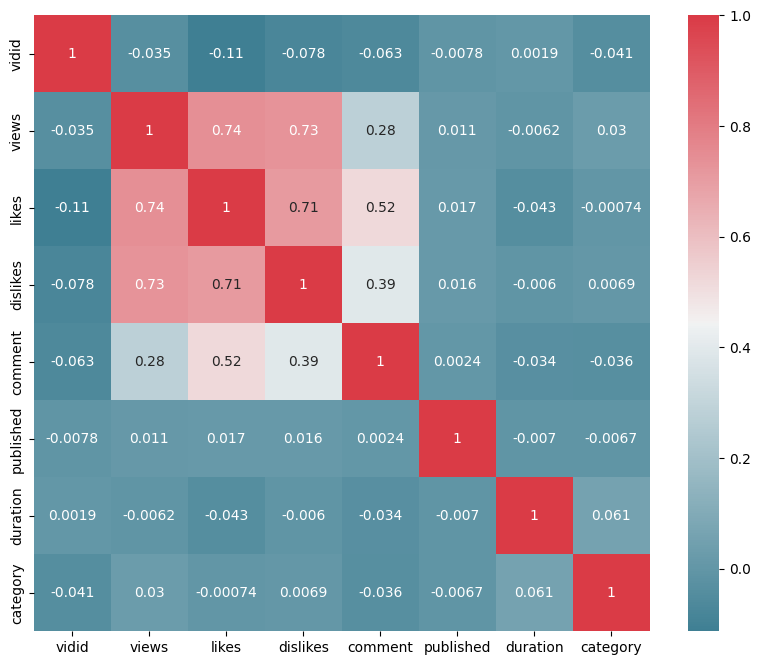

In [ ]:
import seaborn as sns

f, ax = plt.subplots(figsize=(10, 8))
corr=datatest.corr()
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=bool), cmap=sns.diverging_palette(220, 10, as_cmap=True),
square=True, ax=ax,annot=True)
plt.show()

In [ ]:
model_name=joblib.load('randomforest_youtubeadview.pkl')
prediction = model_name.predict(X_test)
#prediction = model_name.predict(datatest)
prediction

array([16.63,  6.72,  3.5 , ..., 12.48, 73.3 , 20.2 ])

In [ ]:
prediction=prediction.astype(int)

In [ ]:
prediction = prediction.reshape(1,-1)[0].tolist()

result={'adview':prediction}
pd.DataFrame(result).to_csv('adview_predictions.csv',index=False)

In [ ]:
pd.read_csv('adview_predictions.csv')

,adview
0,16
1,6
2,3
3,11
4,1325
...,...
2923,724
2924,5
2925,12
2926,73
